# Section V.C. Exploratory Analysis of Query Variants and Metric Relationships

This notebook provides time series visualizations and correlation analysis for representative query variants in `SimulatedQueryMetrics.csv`.

## 1. Imports and Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the data
df = pd.read_csv('SimulatedQueryMetrics.csv', parse_dates=['MetricDate'])
df.head()

,SimDay,SimHour,MetricDate,QueryName,QueryVariant,CPU,LatencyMs,LogicalReads,PlanRegression
0,1,0,2025-07-04,Q1,1,53.432663,186.494947,NaN,False
1,1,0,2025-07-04,Q1,2,57.975274,193.763125,157.573013,True
2,1,0,2025-07-04,Q1,3,55.829855,190.330454,161.998510,False
3,1,0,2025-07-04,Q1,4,52.646475,185.237045,165.178454,True
4,1,0,2025-07-04,Q1,5,55.029501,189.049886,175.038085,False


## 2. Visualize CPU Usage for Two Query Variants

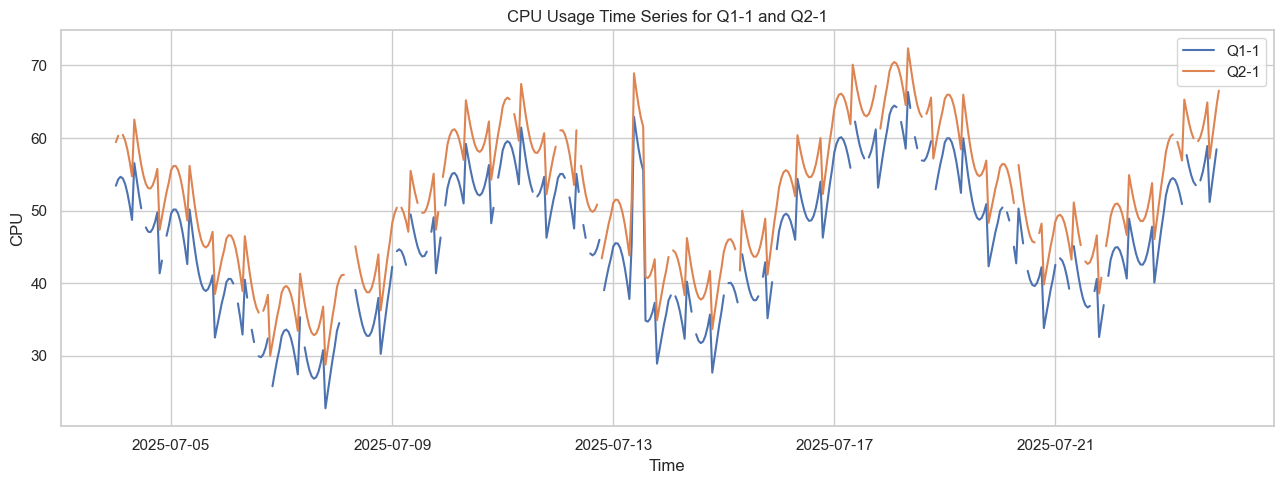

In [5]:
# Select two representative query variants, e.g., Q1-1 and Q2-1
variants = [ ('Q1', 1), ('Q2', 1) ]

plt.figure(figsize=(13, 5))
for q, v in variants:
    df_sub = df[(df['QueryName'] == q) & (df['QueryVariant'] == v)].sort_values('MetricDate')
    plt.plot(df_sub['MetricDate'], df_sub['CPU'], label=f'{q}-{v}')

plt.title('CPU Usage Time Series for Q1-1 and Q2-1')
plt.xlabel('Time')
plt.ylabel('CPU')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Annotate Observed Patterns

- Look for cyclical patterns, peaks, or anomalies in the time series above.
- Note any synchronized spikes or regime shifts (e.g., deployment or plan regression events).

## 4. Correlation Heatmap for Metrics

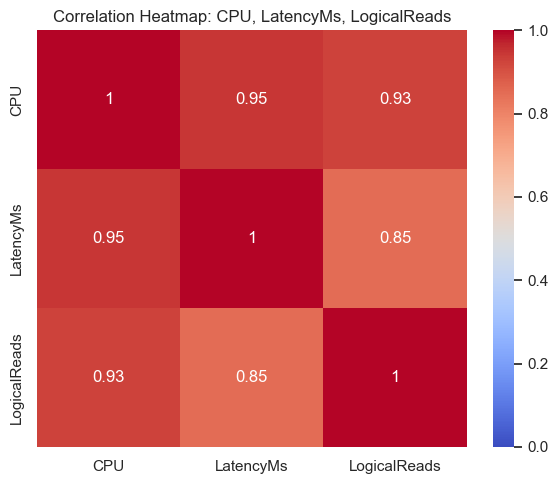

                   CPU  LatencyMs  LogicalReads
CPU           1.000000   0.948380      0.929176
LatencyMs     0.948380   1.000000      0.850433
LogicalReads  0.929176   0.850433      1.000000


In [9]:
# Use all data for main metrics
metrics = ['CPU', 'LatencyMs', 'LogicalReads']
corr = df[metrics].corr(method='pearson')

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Heatmap: CPU, LatencyMs, LogicalReads')
plt.tight_layout()
plt.show()

print(corr)

## 5. Optional: Correlations by Query Variant
You can also compute correlations for each query or variant separately, if desired.

In [11]:
# Example: Compute correlations for Q1-1
df_q1v1 = df[(df['QueryName'] == 'Q1') & (df['QueryVariant'] == 1)]
corr_q1v1 = df_q1v1[metrics].corr()
print('Correlations for Q1-1:')
print(corr_q1v1)

# Or loop for all variants
for q in ['Q1', 'Q2']:
    for v in range(1, 6):
        df_sub = df[(df['QueryName'] == q) & (df['QueryVariant'] == v)]
        c = df_sub[metrics].corr()
        print(f'{q}-{v}:')
        print(c)
        print('-'*30)

Correlations for Q1-1:
                   CPU  LatencyMs  LogicalReads
CPU           1.000000   0.981826      0.999999
LatencyMs     0.981826   1.000000      0.986098
LogicalReads  0.999999   0.986098      1.000000
Q1-1:
                   CPU  LatencyMs  LogicalReads
CPU           1.000000   0.981826      0.999999
LatencyMs     0.981826   1.000000      0.986098
LogicalReads  0.999999   0.986098      1.000000
------------------------------
Q1-2:
                  CPU  LatencyMs  LogicalReads
CPU           1.00000   0.967460      1.000000
LatencyMs     0.96746   1.000000      0.966202
LogicalReads  1.00000   0.966202      1.000000
------------------------------
Q1-3:
                   CPU  LatencyMs  LogicalReads
CPU           1.000000   0.990807      0.999999
LatencyMs     0.990807   1.000000      0.988910
LogicalReads  0.999999   0.988910      1.000000
------------------------------
Q1-4:
                   CPU  LatencyMs  LogicalReads
CPU           1.000000   0.957738      1.000000


## 6. Interpretation
- The time series show cyclical and anomalous behavior, confirming the presence of trends, seasonality, and operational events.
- The correlation heatmap reveals strong positive relationships among metrics (e.g., CPU–LatencyMs, CPU–Reads), supporting the suitability of multivariate forecasting models.